# Assignment 3

## <u>Task 1</u>

### a) Data Feature Extraction

In [104]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Vectorize training data
X_train = train_data['Text']
y_train = train_data['Category']
# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Vectorize testing data
X_test = test_data['Text']
y_test = test_data['Category']
# Preprocess the text data using the same vectorizer
X_test = vectorizer.transform(X_test)

full_dataset = pd.concat([train_data, test_data], ignore_index=True)
X_full_dataset = full_dataset['Text']
X_full_dataset = vectorizer.transform(X_full_dataset)

# Analyse training data
print(f"Number of articles: {X_full_dataset.shape[0]}")
print(f"Number of extracted features: {X_full_dataset.shape[1]}\n")
print("First 5 articles and their extracted features:\n")
feature_names = vectorizer.get_feature_names_out()
sample_article_feature_arrays = X_full_dataset[:5].toarray()
sample_df = pd.DataFrame(sample_article_feature_arrays, columns=feature_names)
sample_df = sample_df.rename_axis('id')
for index in range(len(sample_article_feature_arrays)):
    print(f"Article {index}: \"{full_dataset['Text'][index][:120]}...\"")
sample_df

Number of articles: 534
Number of extracted features: 13518

First 5 articles and their extracted features:

Article 0: "lifestyle governs mobile choice faster better funkier hardware alone going help phone firms sell handsets research sugge..."
Article 1: "french honour director parker british film director sir alan parker made officer order arts letters one france highest c..."
Article 2: "fockers fuel festive film chart comedy meet fockers topped festive box office north america setting new record christmas..."
Article 3: "housewives lift channel 4 ratings debut us television hit desperate housewives helped lift channel 4 january audience sh..."
Article 4: "u2 desire number one u2 three prestigious grammy awards hit vertigo stubbornly clinging status one biggest bands world p..."


,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### b)

Top 50 terms across the entire dataset:


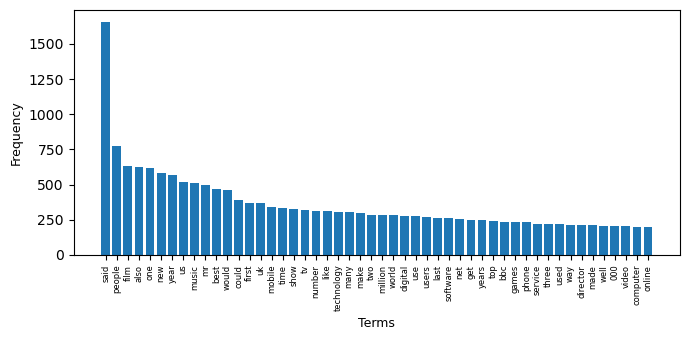

Term frequency distribution by respective classes:
tech:


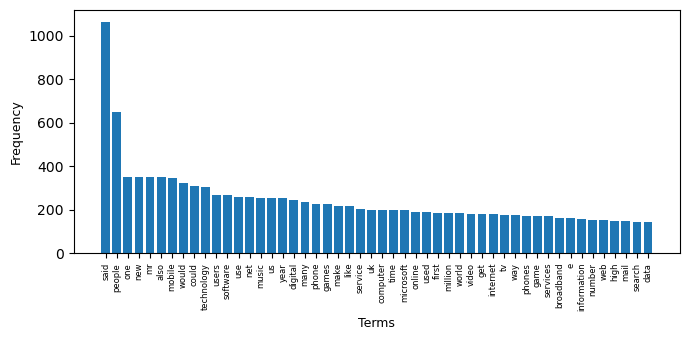

entertainment:


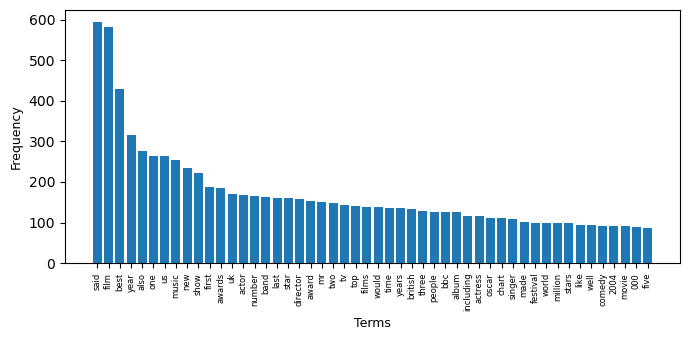

Total examples by class distribution:


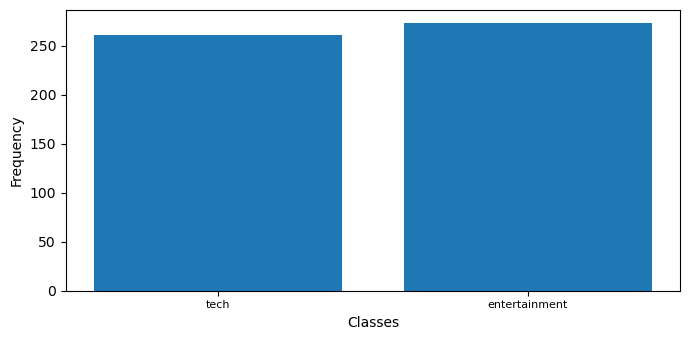

In [105]:
import matplotlib.pyplot as plt
import re

# removes un-needed characters from each text in the dataset.
def tokenize(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # split into words
    words = text.split()
    return words


# gets data frequencies and returns a dictionary of frequencies by class, and frequency overall
classes = full_dataset['Category'].unique()
word_frequency_dict = {}
word_counts_by_class = {}
vocabulary = set()
for c in classes:
    class_df = full_dataset[full_dataset['Category'] == c]
    word_counts_by_class[c] = {}
    for abstract in class_df['Text']:
        abstract_words = tokenize(abstract)
        for word in abstract_words:
            if word not in vocabulary:
                word_frequency_dict[word] = 0
                vocabulary.add(word)
            if word not in word_counts_by_class[c]:
                word_counts_by_class[c][word] = 1
            else:
                word_counts_by_class[c][word] += 1
            word_frequency_dict[word] += 1

print("Top 50 terms across the entire dataset:")
# gets the top 50 terms and plots it for frequency distribution
words = []
values = []
for key in sorted(word_frequency_dict, key=word_frequency_dict.get, reverse=True)[:50]:
    words.append(key)
    values.append(word_frequency_dict[key])
plt.rc("xtick", labelsize=6)
plt.xticks(rotation=90)
plt.xlabel('Terms', fontsize=9)
plt.ylabel("Frequency", fontsize=9)
plt.bar(range(len(words)), values, tick_label=words, align='center')
plt.show()

print("Term frequency distribution by respective classes:")
# creates a plot for term frequency distribution by respective class
for class_label, data in word_counts_by_class.items():
    data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
    print(class_label + ":")
    words = list(data.keys())[:50]
    frequencies = list(data.values())[:50]
    plt.rc("xtick", labelsize=6)
    plt.xticks(rotation=90)
    plt.xlabel('Terms', fontsize=9)
    plt.ylabel("Frequency", fontsize=9)
    plt.bar(range(len(words)), frequencies, tick_label=words, align='center')
    plt.show()

names = list(word_counts_by_class.keys())
values = [0, 0]
for i in full_dataset["Category"]:
    if i.lower() == "tech":
        values[0] += 1
    else:
        values[1] += 1

print("Total examples by class distribution:")
plt.rc("xtick", labelsize=8)
plt.xlabel('Classes', fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.bar(range(2), values, tick_label=names, align='center')
plt.show()

## <u>Task 2</u>

### a) Naive Bayes

In [106]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

With the preprocessed data we can easily train the Naive Bayes model and predict the categories for the test data.

In [107]:
# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the categories for the testing data
y_pred = classifier.predict(X_test)

# Print the predicted categories
print(y_pred)
print("\n")

['entertainment' 'tech' 'tech' 'entertainment' 'entertainment'
 'entertainment' 'entertainment' 'tech' 'entertainment' 'entertainment'
 'entertainment' 'tech' 'entertainment' 'entertainment' 'entertainment'
 'entertainment' 'entertainment' 'entertainment' 'tech' 'tech'
 'entertainment' 'entertainment' 'tech' 'entertainment' 'tech'
 'entertainment' 'tech' 'tech' 'entertainment' 'tech' 'entertainment'
 'tech' 'tech' 'tech' 'entertainment' 'tech' 'entertainment' 'tech' 'tech'
 'tech' 'tech' 'entertainment' 'entertainment' 'tech' 'entertainment'
 'entertainment' 'tech' 'entertainment' 'entertainment' 'tech' 'tech'
 'entertainment' 'entertainment' 'entertainment' 'entertainment' 'tech'
 'entertainment' 'tech' 'tech' 'tech' 'tech' 'tech' 'tech' 'tech'
 'entertainment' 'entertainment' 'tech' 'entertainment' 'entertainment'
 'tech' 'entertainment' 'entertainment' 'tech' 'entertainment'
 'entertainment' 'entertainment' 'tech' 'entertainment' 'entertainment'
 'entertainment' 'entertainment' 'ent

#### (i) Report the top-20 most identifiable words that are most likely to occur in the articles over two classes

In [108]:
# Get the class labels
class_labels = classifier.classes_

# Find the indices of the tech and entertainment classes
tech_index = np.where(class_labels == 'tech')[0][0]
entertainment_index = np.where(class_labels == 'entertainment')[0][0]

feature_names = vectorizer.get_feature_names_out()

# Get the feature probabilities for the tech class
tech_feature_probabilities = np.exp(classifier.feature_log_prob_[tech_index])

# Get the feature probabilities for the entertainment class
entertainment_feature_probabilities = np.exp(classifier.feature_log_prob_[entertainment_index])

# Get the indices of the top 20 most identifiable words for the tech class
top_20_tech_words_indices = np.argsort(tech_feature_probabilities)[::-1][:20]

# Get the indices of the top 20 most identifiable words for the entertainment class
top_20_entertainment_words_indices = np.argsort(entertainment_feature_probabilities)[::-1][:20]

# Print the top 20 most identifiable words for the tech class
print("Top 20 most identifiable words for the tech class:")
for index in top_20_tech_words_indices:
    print(feature_names[index])
print("\n")

# Print the top 20 most identifiable words for the entertainment class
print("Top 20 most identifiable words for the entertainment class:")
for index in top_20_entertainment_words_indices:
    print(feature_names[index])
print("\n")

Top 20 most identifiable words for the tech class:
said
people
new
mobile
mr
one
also
would
could
technology
use
users
net
software
games
us
music
many
year
phone


Top 20 most identifiable words for the entertainment class:
said
film
best
year
music
also
us
new
one
show
first
awards
tv
last
uk
actor
number
band
mr
star




#### (ii) Report the top-20 words that maximze the quantity P(X_w = 1 | Y = y) / P(X_w = 1 | Y != y)

In [109]:
# Calculate the ratio P(X_w = 1 | Y = y) / P(X_w = 1 | Y != y) for each word
tech_ratios = tech_feature_probabilities / entertainment_feature_probabilities
entertainment_ratios = entertainment_feature_probabilities / tech_feature_probabilities

# Get the indices of the top 20 words with the highest ratios for each class
top_20_tech_words_indices = np.argsort(tech_ratios)[-20:][::-1]
top_20_entertainment_words_indices = np.argsort(entertainment_ratios)[-20:][::-1]

# Print the top 20 words that maximize the ratio for the tech class
print("Top 20 words that maximize P(X_w = 1 | Y = tech) / P(X_w = 1 | Y = entertainment):")
for index in top_20_tech_words_indices:
    print(feature_names[index])
print("\n")

# Print the top 20 words that maximize the ratio for the entertainment class
print("Top 20 words that maximize P(X_w = 1 | Y = entertainment) / P(X_w = 1 | Y = tech):")
for index in top_20_entertainment_words_indices:
    print(feature_names[index])
print("\n")

Top 20 words that maximize P(X_w = 1 | Y = tech) / P(X_w = 1 | Y = entertainment):
users
software
microsoft
mobile
broadband
virus
firms
pc
spam
phones
gadget
net
consumer
mobiles
machines
gadgets
windows
technologies
systems
device


Top 20 words that maximize P(X_w = 1 | Y = entertainment) / P(X_w = 1 | Y = tech):
actress
singer
oscar
stars
aviator
band
nominated
rock
festival
album
nominations
charles
chart
foxx
oscars
starring
singles
jamie
swank
comedy




The second list of words (maximises the probability ratio) appears to describe the two classes better. This is because it omits irrelevant and stop words such as "said", "one", "also", "would" and "could" that appear in the first list and score higher than relevant words like "mobile" (tech) and "music" (entertainment). Also, the second list includes more words that are objectively  more relevant to their target classes. For instance, the second list includes different genres of music and film for the entertainment class that are absent in the first list. It also includes more words related to technology class such as "microsoft", "gadget" etc that are not present in the first list. 

### b) kNN

In [110]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import f1_score

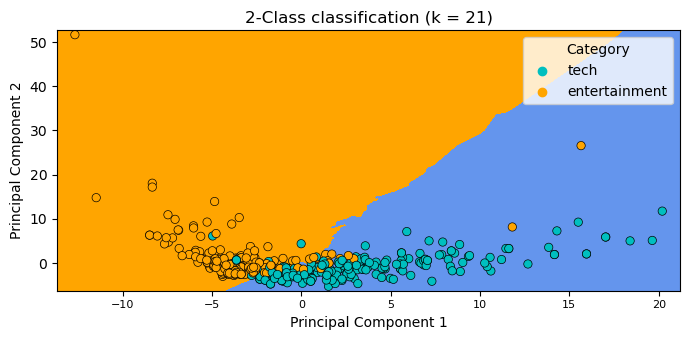

In [111]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())

# Convert classifiers to numeric values
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train) 

X = X_train_pca
y = y_train_numeric
h = .02
cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ['c', 'orange']

# Creating kNN classifier and training it on the training dataset
n = len(train_data)
k_value = round(math.sqrt(n)) # the general rule of thumb in choosing the value of k is k=√n
knn = KNeighborsClassifier(n_neighbors=k_value, p=2) # Chose the k = √n and p (distance metric) = 2 (Euclidian distance)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Creating the surface plot
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_train, palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())  
plt.title("2-Class classification (k = %i)" % (k_value))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

<b>Explain the impact of k and the distance metric on the decision boundary</b>

The k parameter indicates the number of nearest neighbors to consider when making a classification decision. Lower values of k mean that the boundary lines are more likely to follow smaller variations/outliers in the data which gives it more of a jagged appearance. Larger values of k makes the boundary lines are a lot smoother as the model considers more nearest neighbours when making predictions, thereby generalising to a higher degree and not overfitting to single data points. Too small k can leaf to overfitting (reduced bias, increased variance), while too large k can lead to underfitting (higher bias, lower variance). Since the k value for this surface plot is relatively high (21), the boundary line will be quite smooth as shown. 

The distance measure indicates how the distance between points is calculated within the kNN classifer. The choices are Euclidean distance which measure the quickest way between points (in a straight line), Manhattan distance which measures the sum of the absolute differences between two points, and Cosine distance which calculates the angle between the two points considering the direction. Changing the distance metric can vastly change the shape of the decision boundaries and have a certain bias towards specific positions of points. With the Euclidean distance, the boundary generally follows a smooth line and is not aligned against any particular axis. Using Manhattan distance can lead to square-like boundary regions that are aligned against on or more axis. 

Overall, changing the k-parameter and distance metric in this model would result in changes in decision boundary shape, smoothness and potenial accuracy which each choice of parameters involving a trade-off between complexity, overfitting, and pattern recognition.

### c) SVM

First, we will adapt the function <i><b>plot_decision_regions()</b></i> obtained from the lecture material to produce surface plots for our two SVM models:

In [112]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, ax, classifier, target_class_map, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    if ax is None: ax = plt.gca()
    
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label= target_class_map[cl], 
                    edgecolor='k')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        ax.scatter(X_test[y_test == 0, 0],
                        X_test[y_test == 0, 1],
                        c='blue',
                        edgecolor='blue',
                        alpha=1.0,
                        linewidth=1,
                        marker='+',
                        s=100, 
                        label='test set (class 1)')
        ax.scatter(X_test[y_test == 1, 0],
                        X_test[y_test == 1, 1],
                        c='red',
                        edgecolor='red',
                        alpha=1.0,
                        linewidth=1,
                        marker='+',
                        s=100, 
                        label='test set (class 2)')
        
    ax.set_xlabel('Principle Component 1', size=16)
    ax.set_ylabel('Principle Component 2', size=16)
    ax.legend(loc='upper left', fontsize=16)

Next, we will use PCA for dimensionality reduction of our training data. Then, we will fit the two SVM classifiers on the pre-processed data and plot the resultant surface plots on a 2-D plane.

We used PCA over manual feature selection because PCA automates and objectifies the process of finding the directions (principal components) in the data that represent the most significant amount of variation. Principal components also combine information from multiple features. In contrast, manually selecting two "most important" features from such a large set of possibilities may not lead to the same level of information retention, and the features chosen may not effectively reflect the impact of the hyperparameters value.  

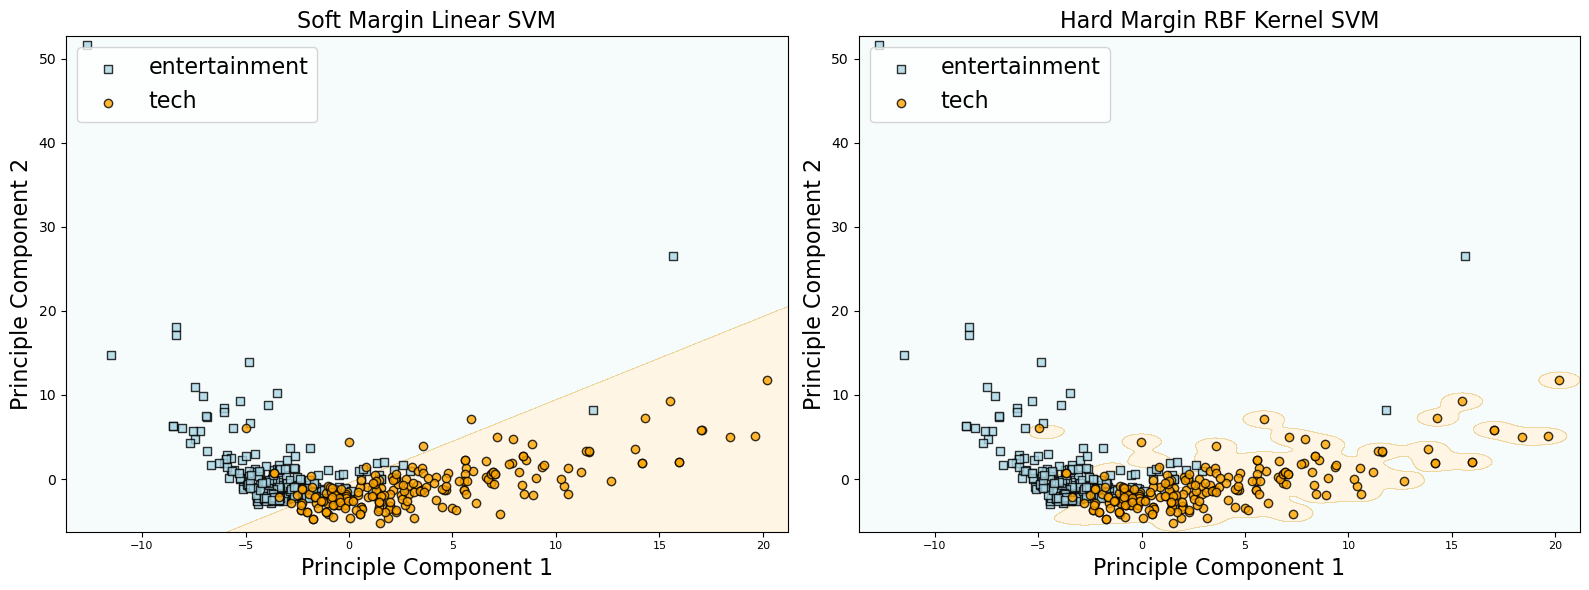

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from math import inf

target_class_map = {}
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train) 

for numeric_label in np.unique(y_train_numeric):
    target_class_map[numeric_label] = label_encoder.inverse_transform([numeric_label])[0]

C = 10
gamma = 1

# Fit the two different SVM classifiers
hard_margin_rbf_kernel_svm = SVC(kernel='rbf', gamma=gamma, C=1e5).fit(X_train_pca, y_train_numeric)
soft_margin_linear_svm = SVC(kernel='linear', C=C).fit(X_train_pca, y_train_numeric)

# Plot the results
for axi, model_info in zip(ax, [(soft_margin_linear_svm, "Soft Margin Linear SVM"), (hard_margin_rbf_kernel_svm, "Hard Margin RBF Kernel SVM")]):
    plot_decision_regions(X_train_pca, y_train_numeric, axi, classifier=model_info[0], target_class_map=target_class_map)

    axi.set_title(f"{model_info[1]}", size=16)

For soft-margin linear SVM, the penalty variable <i>C</i> affects the width of the margin and the resultant bias and variance of our model. A smaller value of C permits a wider margin which reduces the variance of our model at the expense of higher bias (classification error). With a smaller C, our model tends to generalise better as more data points fall within the margin. A larger value of C reduces the margin size, leading to smaller bias and higher variance. With a larger C, our model gives more importance to individual (potentially noisy) data points and the decision boundary fits the training data more closely, which can lead to overfitting.

Our hard-margin kernelised SVM has two hyperparameters: γ (gamma) and the choice of the kernel. The higher the value of gamma (inversely proporitonal to sigma in the underlying RBF function), the smaller the kernel width and the better our model's decision boundary fits individual data points, leading to reduced bias and increased variance (potential for overfitting). The smaller the value of gamma, the smoother the decision boundary which leads to increased bias and reduced variance (better generalisation).

The kernel hyperparameter specifies the kernel function used to transform the input features into a higher-dimensional space. Different kernel functions (e.g., linear, RBF, Poly) produce decision boundaries of different shapes that capture different types of patterns/relationships in the data. A linear kernel results in a linear decision boundary as opposed to RBF kernel which itself produces a more flexible, non-linear boundary.


### d)

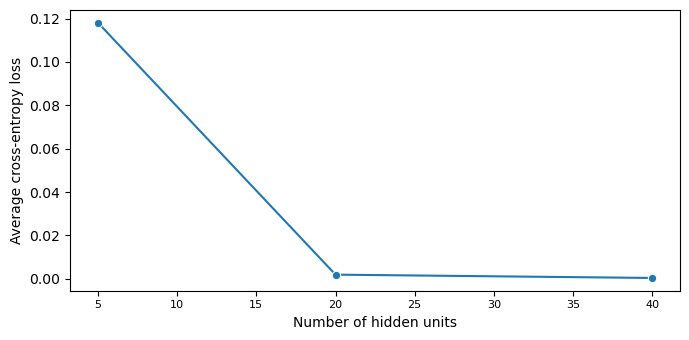

In [114]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from warnings import filterwarnings
filterwarnings('ignore')

hidden_units = [5, 20, 40]
np.random.seed(361)
average_crossEntropy_losses = []

# Finding cross-entropy loss for each of the different hidden unit values\n
for unit in hidden_units:
    nn = MLPClassifier(hidden_layer_sizes=unit, activation='relu', solver='adam', max_iter=100, learning_rate_init=0.01)
    nn.fit(X_train,y_train)
    average_loss = log_loss(y_test, nn.predict_proba(X_test))
    average_crossEntropy_losses.append(average_loss)

# Creating plot
sns.lineplot(x = hidden_units, y = average_crossEntropy_losses, marker = 'o')
plt.xlabel("Number of hidden units")
plt.ylabel("Average cross-entropy loss")
plt.show()

As seen in this graph, as the number of hidden units increases the average cross-entropy loss exponetially decreases untill it converges at 0. The cross-entropy loss quantifies the mismatch between the predicted probability distribution and the true probability distribution therefore quanitifying how well this classifier performs. This means that as the number of hidden units increases, the predicted probability distribution becomes more and more similar to the true probability distribution indicates an increase in performance and accuracy.



## <u>Task 3</u>

### a)

In [115]:
import matplotlib.patches as mpatches
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

knnColour = mpatches.Patch(color='blue', label='kNN Classifier')
nnColour = mpatches.Patch(color='orange', label='NN Classifier')
nbColour = mpatches.Patch(color='green', label='NB Classifier')
svcColour = mpatches.Patch(color='red', label='SVM Classifier')

# Plot training data set size against training accuracy 
sample_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]

##### <u>NB</u>

In [116]:
# Using these portions of the training data
nb_training_results = []
nb_testing_results = []

for m in sample_sizes:
    # get first m part of training data
    m_number = round(X_train.shape[0] * m)
    MX_train = X_train[0:m_number]
    my_train = y_train[0:m_number]
    
    # train classifier on m portion of training data
    classifier = MultinomialNB()
    classifier.fit(MX_train, my_train)

    # prediction on m portion of training data
    m_predictions = classifier.predict(MX_train)

    # prediction on testing data
    test_predictions = classifier.predict(X_test)

    # get f1 score for m training portion
    m_f1_score = metrics.f1_score(my_train, m_predictions, average='micro')

    # get f1 score for testing data
    testing_f1_score = metrics.f1_score(y_test, test_predictions, average='micro')

    # store scores for graphing 
    nb_training_results.append(m_f1_score)
    nb_testing_results.append(testing_f1_score)

##### <u>kNN</u>

In [117]:
# Using these portions of the training data
k_scores_training = []
k_scores_testing = []

for m in sample_sizes:
    # get first m part of training data
    m_number = round(X_train.shape[0] * m)
    MX_train = X_train[0:m_number]
    my_train = y_train[0:m_number]
    
    # train classifier on m portion of training data
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(MX_train, my_train)

    # prediction on m portion of training data
    m_predictions = classifier.predict(MX_train)

    # prediction on testing data
    test_predictions = classifier.predict(X_test)

    # get f1 score for m training portion
    m_f1_score = metrics.f1_score(my_train, m_predictions, average='micro')

    # get f1 score for testing data
    testing_f1_score = metrics.f1_score(y_test, test_predictions, average='micro')

    # store scores for graphing 
    k_scores_training.append(m_f1_score)
    k_scores_testing.append(testing_f1_score)

##### <u>SVM</u>

In [118]:
svm_scores_training = []
svm_scores_testing = []

for m in sample_sizes:
    # get first m part of training data
    m_number = round(X_train.shape[0] * m)
    MX_train = X_train[0:m_number]
    my_train = y_train[0:m_number]
        
    # train classifier on m portion of training data
    classifier = SVC(kernel='linear', C=10)
    classifier.fit(MX_train, my_train)

    # prediction on m portion of training data
    m_predictions = classifier.predict(MX_train)

    # prediction on testing data
    test_predictions = classifier.predict(X_test)

    # get f1 score for m training portion
    m_f1_score = metrics.f1_score(my_train, m_predictions, average='micro')

    # get f1 score for testing data
    testing_f1_score = metrics.f1_score(y_test, test_predictions, average='micro')

    # store scores for graphing 
    svm_scores_training.append(m_f1_score)
    svm_scores_testing.append(testing_f1_score)

##### <u>NN</u>

In [119]:
np.random.seed(361)
# Using these portions of the training data
nn_scores_training = []
nn_scores_testing = []

for m in sample_sizes:
    # get first m part of training data
    m_number = round(X_train.shape[0] * m)
    MX_train = X_train[0:m_number]
    my_train = y_train[0:m_number]
    
    # train classifier on m portion of training data
    classifier = MLPClassifier(hidden_layer_sizes=6, activation='relu', solver='adam', max_iter=100, learning_rate_init=0.01)
    classifier.fit(MX_train, my_train)

    # prediction on m portion of training data
    m_predictions = classifier.predict(MX_train)

    # prediction on testing data
    test_predictions = classifier.predict(X_test)

    # get f1 score for m training portion
    m_f1_score = metrics.f1_score(my_train, m_predictions, average='micro')

    # get f1 score for testing data
    testing_f1_score = metrics.f1_score(y_test, test_predictions, average='micro')

    # store scores for graphing 
    nn_scores_training.append(m_f1_score)
    nn_scores_testing.append(testing_f1_score)

##### <u>Plotting</u>

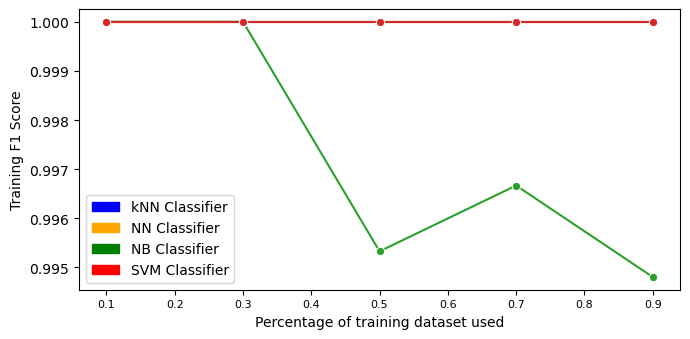

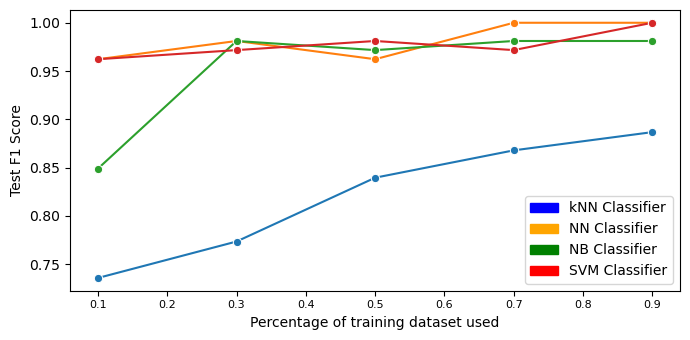

In [120]:
# training plot
sns.lineplot(x = sample_sizes, y = k_scores_training, marker = 'o')
sns.lineplot(x = sample_sizes, y = nn_scores_training, marker = 'o')
sns.lineplot(x = sample_sizes, y = nb_training_results, marker = 'o')
sns.lineplot(x = sample_sizes, y = svm_scores_training, marker = 'o')
plt.legend(handles=[knnColour, nnColour, nbColour, svcColour])
plt.xlabel("Percentage of training dataset used")
plt.ylabel("Training F1 Score")
plt.show()

# testing plot
sns.lineplot(x = sample_sizes, y = k_scores_testing, marker = 'o')
sns.lineplot(x = sample_sizes, y = nn_scores_testing, marker = 'o')
sns.lineplot(x = sample_sizes, y = nb_testing_results, marker = 'o')
sns.lineplot(x = sample_sizes, y = svm_scores_testing, marker = 'o')
plt.legend(handles=[knnColour, nnColour, nbColour, svcColour])
plt.xlabel("Percentage of training dataset used")
plt.ylabel("Test F1 Score")
plt.show()

##### <u>Discussion</u>

From the training F1-score plot, we can observe that all classifiers have a consistent and nearly-perfect prediction performance across all of the subsets of the training set. This result is expected because each model has observed and 'memorized' the patterns in the training data during training, and hence has easily make high quality predictions on that same data. The line representing prediction score on the training set for NB appears irregular; but the magnitude of these irregularities is within an acceptable range of 0.005, so those can be attributed to noise in the data. 

From the testing F1-score plot, we can observe a positive trend across all models thereby the predictive performance increases as we increase size of the training set. This result is also expected because with more training data, each model learns from a bigger and more representative sample of the underlying distribution. This allows the models to capture more underlying patterns and relationships in the data, thereby generalising better on unseen data. Also, by fixing the complexity of each model, we reduce their change of overfitting, thereby leading to reduced variance and better predictive performance. We observe that our kNN model is the most sensitive to the size of the training set. It's initial F1 score on the test set starts from 0.72 and climbs (almost linearly) to around 0.86, which is the lowest maximum F1 score across all tested models.

### b)

#### NB Cross Validation
The hyperparameter we will tune in our Naive Bayes model is the smoothing parameter alpha which is used during Laplace Smoothing and helps to address the issue of zero probabilities for unseen features in the training data. It introduces a small pseudo-count to all feature occurrences, including those that were not observed in the training set.

In general alpha = 1 is used just to remove the problem of zero probability. However, we will try 7 different values of alpha and do a cross validation for each of them to see how it affects the predictive performance of our model. 

In [121]:
from sklearn.model_selection import cross_val_score
alpha_values = [1, 2, 5, 25, 50, 100, 1000]
y_test_numeric = label_encoder.fit_transform(y_test)

print("Cross Validation of Naive Bayes:\n")

for a in alpha_values:
    print(f'alpha = {a}')
    classifier = MultinomialNB(alpha=a).fit(X_train, y_train_numeric)
    scores = cross_val_score(classifier, X_train, y_train_numeric, cv=5, scoring='f1')
    validation_accuracy = scores.mean()
    
    y_pred = classifier.predict(X_test)
    test_score = metrics.f1_score(y_test_numeric, y_pred)
    
    print(f'Validation F1-Score = {round(validation_accuracy, 3)}')
    print(f'Test F1-Score = {round(test_score, 3)}\n')

Cross Validation of Naive Bayes:

alpha = 1
Validation F1-Score = 0.981
Test F1-Score = 0.968

alpha = 2
Validation F1-Score = 0.981
Test F1-Score = 0.968

alpha = 5
Validation F1-Score = 0.973
Test F1-Score = 0.968

alpha = 25
Validation F1-Score = 0.936
Test F1-Score = 0.928

alpha = 50
Validation F1-Score = 0.918
Test F1-Score = 0.918

alpha = 100
Validation F1-Score = 0.888
Test F1-Score = 0.909

alpha = 1000
Validation F1-Score = 0.837
Test F1-Score = 0.841



We observe that as alpha increases, both the cross-validation and the test F1 scores go down. We conclude that alpha=1 is the optimal hyper-parameter setting for our Naive Bayes model. 

A higher values of alpha pushes each probability estimate towards a more uniform distribution. This means that the model tends to generalise to a higher degree and assigns more equal probabilities to different classes or feature values. This can lead to a decrease in the model's variance at the expense of increased bias. Therefore, increasing alpha may reduce overfitting, but can also lead to underfitting if set too high. Underfitting is what we are likely observing in our experiment as alpha decreases. 

#### kNN Cross Validation

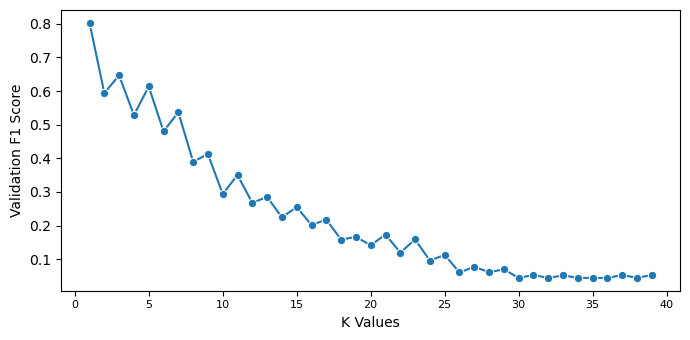

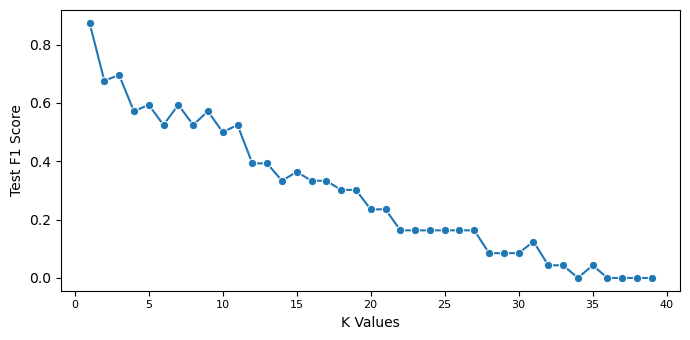

In [122]:
# 5-fold Cross Validation for kNN
k_values = [i for i in range (1,40)]
validation_scores = []
test_scores = []

for k in k_values:    
    knn = KNeighborsClassifier(n_neighbors=k)
    validation_score = cross_val_score(knn, X_train, y_train_numeric, cv=5, scoring='f1')
    validation_scores.append(np.mean(validation_score))
    
    test_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train_numeric)
    test_predictions = test_model.predict(X_test)
    test_f1 = metrics.f1_score(y_test_numeric, test_predictions)
    test_scores.append(test_f1)

sns.lineplot(x = k_values, y = validation_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Validation F1 Score")
plt.show()

sns.lineplot(x = k_values, y = test_scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Test F1 Score")
plt.show()


These two graphs show the values of k in the kNN classifier from 1-39 as well as the coresponding F1 score it produced. In both graphs (for validation and test accuracy) there is a negative trend thereby the classifier's F1 score decreases (exponentially) as the value of k increases. The best performing classifier was when k = 1 with the validation F1 score of 0.801 and the test F1 score of 0.875 (3dp).

As k significantly increases, the model tends to underfit the training data and hence make overgeneralised predictions, resulting in a higher bias (lower accuracy and F1 score). However, with very small values of k (such as 1), we would expect to observe overfitting thereby the model fits the decision boundaries closer to individual datapoints, some of which may be noise. However, we observed that our model makes the most accurate predictions when k is small. This could be due to the high dimensionality of our data, where each one of the hundreds of unique words is considered as a separate feature. This may lead to a very sparse data space and lead to this unusual result. We also ran a separate experiment (not included here) thereby we used a 2-dimensional training set obtained through PCA to perform the same hyper-parameter tuning procudure. The resultant F1-score curve was initially increasing and eventually started to dip as k was increasing, which is consistent with our expectations.

#### SVM Cross Validation

When it comes to tunable hyper-parameters for SVM, an obvious choice is the Kernel we will use. For our experiments, we have chosen to test on a linear SVM and an RBF Kernelized SVM.

For linear SVM we will also observe what happens when we change the value of C while for the RBF SVM, we will observe what happens when we change the gamma.

In [123]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1]
y_test_numeric = label_encoder.fit_transform(y_test)
print("Linear SVM:")

#Cross-Validation of the Linear SVM
for i in range(len(c_values)):
    c = c_values[i]

    soft_margin_linear_svm = SVC(kernel='linear', C=c).fit(X_train, y_train_numeric)
    scores = cross_val_score(soft_margin_linear_svm, X_train, y_train_numeric, scoring='f1', cv=5)
    validation_score = scores.mean()

    y_pred = soft_margin_linear_svm.predict(X_test)
    test_score = metrics.f1_score(y_test_numeric, y_pred)
    print(f'C = {c} | Validation F1-Score = {round(validation_score, 3)} | Test F1-Score = {round(test_score, 3)}')

print()
print("RBF Kernel SVM:")

#Cross-Validation of the RBF SVM
for i in range(len(gamma_values)):
    gamma = gamma_values[i]

    hard_margin_rbf_kernel_svm = SVC(kernel='rbf', gamma=gamma, C=1e5).fit(X_train, y_train_numeric)
    scores = cross_val_score(hard_margin_rbf_kernel_svm, X_train, y_train_numeric, scoring='f1', cv=5)
    validation_score = scores.mean()

    y_pred = hard_margin_rbf_kernel_svm.predict(X_test)
    test_score = metrics.f1_score(y_test_numeric, y_pred)
    print(f'Gamma = {gamma} | Validation F1-Score = {round(validation_score, 3)} | Test F1-Score = {round(test_score, 3)}')

Linear SVM:
C = 0.0001 | Validation F1-Score = 0.782 | Test F1-Score = 0.889
C = 0.001 | Validation F1-Score = 0.956 | Test F1-Score = 0.989
C = 0.01 | Validation F1-Score = 0.964 | Test F1-Score = 1.0
C = 0.1 | Validation F1-Score = 0.964 | Test F1-Score = 1.0
C = 1 | Validation F1-Score = 0.964 | Test F1-Score = 1.0

RBF Kernel SVM:
Gamma = 0.0001 | Validation F1-Score = 0.972 | Test F1-Score = 1.0
Gamma = 0.001 | Validation F1-Score = 0.97 | Test F1-Score = 1.0
Gamma = 0.01 | Validation F1-Score = 0.832 | Test F1-Score = 0.83
Gamma = 0.1 | Validation F1-Score = 0.312 | Test F1-Score = 0.364
Gamma = 1 | Validation F1-Score = 0.292 | Test F1-Score = 0.364


In the below discussion, "accuracy" refers to F1-score metric.

Linear SVM:
For the linear SVM, we can see that as we increase the value of C, the validation accuracy and test accuracy continues to increase. However, once we hit C=0.01, the validation accuracy hits a limit and will not increase with any further increases to C. This is likely because we reached an optimal decision boundary at a lower C, such that even if we increase C, the model will still pick the same optimal hyperplane from lower C values.

RBF SVM:
For the RBF SVM, we can see that when our gamma value is very small, our accuracy is very good. However, as we increase our gamma, our accuracy decreases significantly. This is because, with the RBF SVM, the higher the gamme value is, the more focused the model will be on individual training points. This means, as gamma increases, our model will be more prone to overfitting and will perform poorly on the validation and test sets.

Result:
When it comes to choosing the best Kernel for our final comparison, we could choose either the linear or RBF SVM as with specific hyperparameters, they both produce similar accuracy scores. However, the RBF SVM with gamma = 0.0001 has the best cross-validation score. Therefore, we will use the RBF SVM with gamma = 0.0001 in the final comparison.

#### NN Cross Validation

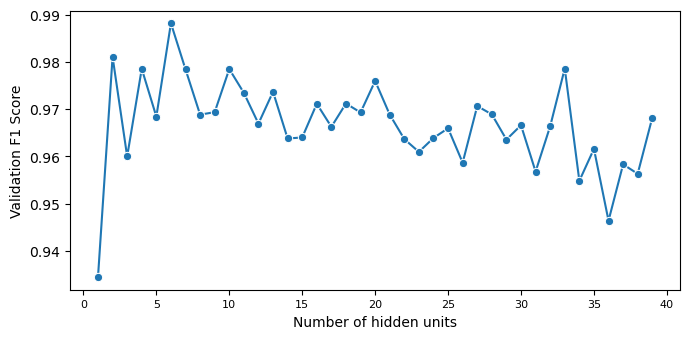

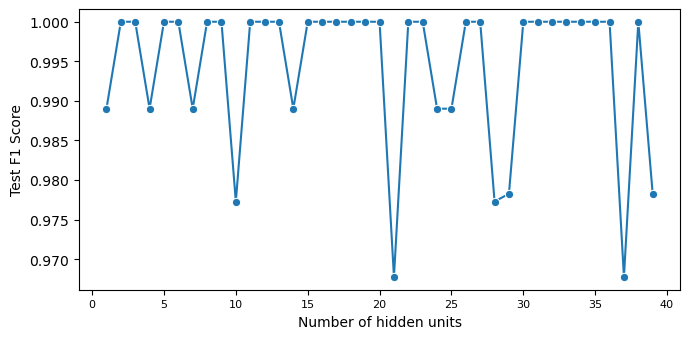

In [124]:
np.random.seed(361)

# 5-fold Cross Validation for NN
hidden_units = [i for i in range (1,40)]
validation_scores = []
test_scores = []

for units in hidden_units:
    nn = MLPClassifier(hidden_layer_sizes=units, activation='relu', solver='adam', max_iter=100, learning_rate_init=0.01)
    validation_score = cross_val_score(nn, X_train, y_train_numeric, cv=5, scoring='f1') 
    validation_scores.append(np.mean(validation_score))
    test_model = nn.fit(X_train, y_train_numeric)
    test_predictions = test_model.predict(X_test)
    test_f1_score = metrics.f1_score(y_test_numeric, test_predictions)
    test_scores.append(test_f1_score)
    
sns.lineplot(x = hidden_units, y = validation_scores, marker = 'o')
plt.xlabel("Number of hidden units")
plt.ylabel("Validation F1 Score")
plt.show()

sns.lineplot(x = hidden_units, y = test_scores, marker = 'o')
plt.xlabel("Number of hidden units")
plt.ylabel("Test F1 Score")
plt.show()

These graphs show the number of hidden units in the NN classifier from 1-39 as well as the coresponding F1 score it produced. In the validation F1-score graph there seems to be a slight negative trend with the F1 score slowly decreasing the larger the number of hidden units. On the test F1-score graph, we observe the majority of the accuracy scores being 1 with there being a few several dips to 0.99, 0.976 and 0.967. Overall, the test F1 score remains within the range 0.967 and 1, which is relatively high. It appears that only small number of hidden units is required to achieve maximum prediction performance on the test set. This observed dips could be the result of random initialisation of the model's weights during each training iteration.  

We will pick 6 to be the optimal hidden layer size for our model as it results in the highest F1 score on both the training and testing sets. We did not pick a higher number because increasing the number of hidden units can increase the chance of overfitting. This is because an increase in the number of hidden units would lead to a more complex model which could result in the classifier memorizing the training examples instead of learning its underlying patterns. This 'memorization' can lead to overfitting. 

At the same time, using a very small number of hidden units can lead to underfitting as the model would overgeneralise its predictions. This means that an increase in model complexity also help combat underfitting. 

From these graphs we can see that when there are 6 hidden units it maximises both the test F1 score and validiation F1 score, and therefore results in an optimal model complexity which is sufficient to combat underfitting but does excessively not overfit to the data.

### c)


We will train each classifier with the best selected hyperparameters, then computer and compare their F1-score on the testing set:

In [125]:
print("Final evaluation (F1-score on test set):\n")

# NB
nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)
nb = nb.predict(X_test)
nb_f1_scoree = metrics.f1_score(y_test, nb, pos_label="tech")
print("nb: ", round(nb_f1_scoree, 6))

# kNN
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_test_predictions = knn.predict(X_test)
knn_f1_score = metrics.f1_score(y_test, knn_test_predictions, pos_label="tech")
print("kNN: ", round(knn_f1_score, 6))

# NN
nn = MLPClassifier(hidden_layer_sizes=6, activation='relu', solver='adam', max_iter=100, learning_rate_init=0.01).fit(X_train, y_train)
nn_test_predictions = nn.predict(X_test)
nn_f1_score = metrics.f1_score(y_test, nn_test_predictions, pos_label="tech")
print("NN: ", round(nn_f1_score, 6))

# SVM
svm = SVC(kernel='rbf', gamma=0.0001, C=1e5).fit(X_train, y_train)
svm_test_predictions = svm.predict(X_test)
svm_f1_score = metrics.f1_score(y_test, svm_test_predictions, pos_label="tech")
print("SVM: ", round(svm_f1_score, 6))

Final evaluation (F1-score on test set):

nb:  0.967742
kNN:  0.875
NN:  1.0
SVM:  1.0


We observe that NN and SVM have obtained the highest F1 score of 1 on the test set. kNN had the lowest performance at F1 = 0.875. Naive Bayes sits in-between at 0.9677. 